In [233]:
import torch
import torch.nn.functional as F
import torchaudio
from torchaudio import transforms

import matplotlib.pyplot as plt

import librosa
import numpy as np

from pathlib import Path

%cd ../io
from load import readAudio, readAnnotations, compute_log_filterbank, compute_log_filter_spectrogram
%cd ..
from preprocess import invert_mel_spectrogram, invert_log_filter_spectrogram
%cd notebooks

import IPython

/Users/runarfosse/Desktop/OneDrive - University of Bergen/Master Thesis/io
/Users/runarfosse/Desktop/OneDrive - University of Bergen/Master Thesis
/Users/runarfosse/Desktop/OneDrive - University of Bergen/Master Thesis/notebooks


/Users/runarfosse/Library/Python/3.11/lib/python/site-packages/IPython/core/magics/osm.py:417: UserWarning: This is now an optional IPython functionality, setting dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


# Display some example spectrograms

In [ ]:
path = Path("../data/SADTP/Red Swan/mix.wav")

waveform, sr = torchaudio.load(path)
waveform = waveform.mean(dim=0)[sr*215:sr*220]

n_fft, win_length, hop_length, power, f_min, f_max, normalized = 2048, 512, (sr // 100), 1, 20, 20000, True
spectrogram = torchaudio.transforms.Spectrogram(n_fft=n_fft, win_length=win_length, hop_length=hop_length, power=power)(waveform)
mel_spectrogram = torchaudio.transforms.MelSpectrogram(sample_rate=sr, n_fft=n_fft, win_length=win_length, hop_length=hop_length, power=power, n_mels=84, normalized=normalized, f_min=f_min, f_max=f_max)(waveform)
log_filter_spectrogram = compute_log_filter_spectrogram(waveform, sr=sr, n_fft=n_fft, win_length=win_length, power=power, norm=normalized, f_min=f_min, f_max=f_max)

log_spectrogram = torch.log10(spectrogram + 1)
log_mel_spectrogram = torch.log10(mel_spectrogram + 1)

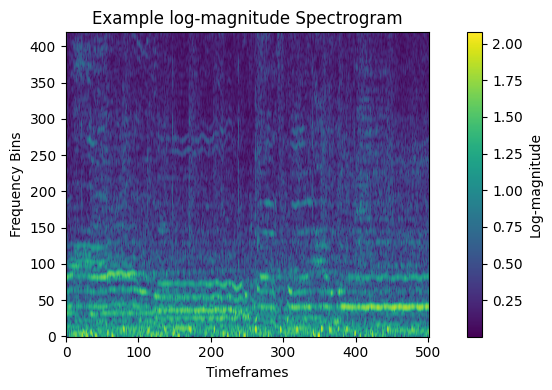

In [235]:
fig, ax = plt.subplots(figsize=(8, 4))
image = ax.imshow(log_spectrogram[:420])
plt.colorbar(image, label="Log-magnitude")
ax.invert_yaxis()

plt.title("Example log-magnitude Spectrogram")
ax.set_ylabel("Frequency Bins")
ax.set_xlabel("Timeframes")

fig.tight_layout()
plt.savefig("../thesis/figures/logspectrogram.png", bbox_inches='tight')
plt.show()

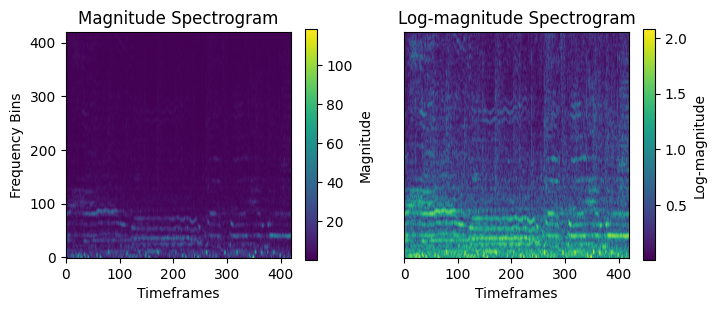

In [236]:
fig, axes = plt.subplots(ncols=2, figsize=(8, 3))
left, right = axes[0].imshow(spectrogram[:420, :420]), axes[1].imshow(log_spectrogram[:420, :420])
plt.colorbar(left, label="Magnitude")
plt.colorbar(right, label="Log-magnitude")
axes[0].invert_yaxis()
axes[1].invert_yaxis()

axes[0].set_ylabel("Frequency Bins")
axes[0].set_xlabel("Timeframes")
axes[0].set_title("Magnitude Spectrogram")
axes[1].get_yaxis().set_visible(False)
axes[1].set_xlabel("Timeframes")
axes[1].set_title("Log-magnitude Spectrogram")

#plt.suptitle('Comparison of magnitude and log-magnitude Spectrogram')
#fig.tight_layout()
plt.savefig("../thesis/figures/spectrogramlogspectrogram.png", bbox_inches='tight')
plt.show()

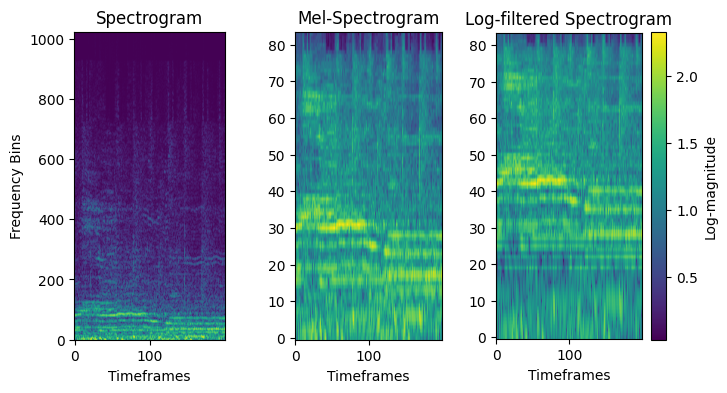

In [241]:
fig, axes = plt.subplots(ncols=3, figsize=(8, 4))
left, middle, right = axes[0].imshow(log_spectrogram[:, :200], aspect=0.4), axes[1].imshow(log_mel_spectrogram[:, :200], aspect=5.0), axes[2].imshow(log_filter_spectrogram[:, :200], aspect=5.0)
plt.colorbar(right, label="Log-magnitude")
axes[0].invert_yaxis()
axes[1].invert_yaxis()
axes[2].invert_yaxis()

axes[0].set_ylabel("Frequency Bins")
axes[0].set_xlabel("Timeframes")
axes[0].set_title("Spectrogram")
#xes[1].get_yaxis().set_visible(False)
axes[1].set_xlabel("Timeframes")
axes[1].set_title("Mel-Spectrogram")
#axes[2].get_yaxis().set_visible(False)
axes[2].set_xlabel("Timeframes")
axes[2].set_title("Log-filtered Spectrogram")

#plt.suptitle('Comparison of Spectrogram, Mel Spectrogram and Log-filter Spectrogram')
#fig.tight_layout()
plt.savefig("../thesis/figures/allspectrograms.png", bbox_inches='tight')
plt.show()